# Parameter Updates / Distinguishability
* Import packages
* Set plotting style

In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

In [2]:
sns.set(style="whitegrid")

matplotlib.rcParams.update(
    {
        "pgf.preamble": (
            r"\usepackage{amsmath} \usepackage{dsfont} \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}"
        ),
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "axes.titleweight": "bold",  # Make titles bold
        "axes.titlesize": 18,  # Increase title size
        "axes.labelsize": 16,  # Increase label size
        "xtick.labelsize": 14,  # Increase x-tick label size
        "ytick.labelsize": 14,  # Increase y-tick label size
        "legend.fontsize": 14,  # Increase legend font size
    }
)

matplotlib.rcParams["text.latex.preamble"] = (
    r"\usepackage{amsmath} \usepackage{dsfont} \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}"
)

# To ensure the changes take effect, you might want to add:
plt.rcParams.update(matplotlib.rcParams)

## Load Data

In [3]:
param_updates = []

for file in os.listdir('param_updates'):
    df = pd.read_csv(f'param_updates/{file}', index_col=0).reset_index(drop=True)

    if file.startswith("param_updates"):
        file = file.replace(".csv", "").split("_")[1:]


    ds = file[1]
    rx = file[2] == 'True'
    ry = file[3] == 'True'
    rz = file[4] == 'True'
    cnot = file[5] == 'True'
    cz = file[6] == 'True'
    layers = int(file[7])
    qubits = int(file[8])

    df['rx'] = rx
    df['ry'] = ry
    df['rz'] = rz
    df['cnot'] = cnot
    df['cz'] = cz
    df['layers'] = layers
    df['qubits'] = qubits
    df['ds'] = ds
    df['parameters_per_layer'] = rx + ry + rz 
    param_updates.append(df)
param_updates = pd.concat(param_updates)
param_updates['method_readable'] = param_updates['rx'].apply(lambda x: "RX " if x else "") + param_updates['ry'].apply(lambda x: "RY " if x else "") + param_updates['rz'].apply(lambda x: "RZ " if x else "") + param_updates['cnot'].apply(lambda x: "CNOT " if x else "") + param_updates['cz'].apply(lambda x: "CZ" if x else "")
param_updates['method_readable'] = param_updates['method_readable'].apply(lambda x: x.replace("  ", " ").strip())
param_updates.head()

,step,mean_change,std_change,per_layer,per_qubit,rx_changes,ry_changes,rz_changes,changed,dnorm,...,rx,ry,rz,cnot,cz,layers,qubits,ds,parameters_per_layer,method_readable
0,0,7.497522e-12,0.0,[7.49752212e-12],[7.49752212e-12],inf,inf,7.497522e-12,1.0,5.695848e-24,...,False,False,True,False,False,1,1,breast,1,RZ
1,1,7.433345e-12,0.0,[7.43334534e-12],[7.43334534e-12],inf,inf,7.433345e-12,1.0,5.598368e-24,...,False,False,True,False,False,1,1,breast,1,RZ
2,2,2.433277e-11,0.0,[2.43327658e-11],[2.43327658e-11],inf,inf,2.433277e-11,1.0,5.999052e-23,...,False,False,True,False,False,1,1,breast,1,RZ
3,3,9.118683e-12,0.0,[9.1186834e-12],[9.1186834e-12],inf,inf,9.118683e-12,1.0,8.424967e-24,...,False,False,True,False,False,1,1,breast,1,RZ
4,4,2.871213e-12,0.0,[2.87121335e-12],[2.87121335e-12],inf,inf,2.871213e-12,1.0,8.353089e-25,...,False,False,True,False,False,1,1,breast,1,RZ


In [4]:
detailed = param_updates[~param_updates['per_qubit'].isna()]

import re
detailed.loc[:, 'per_layer'] = detailed['per_layer'].apply(lambda x: re.split(r"\s+", x[1:-1].strip())).apply(lambda x: [float(i) for i in x])
detailed.loc[:, 'per_qubit'] = detailed['per_qubit'].apply(lambda x: re.split(r"\s+", x[1:-1].strip())).apply(lambda x: [float(i) for i in x])
detailed.head()

,step,mean_change,std_change,per_layer,per_qubit,rx_changes,ry_changes,rz_changes,changed,dnorm,...,rx,ry,rz,cnot,cz,layers,qubits,ds,parameters_per_layer,method_readable
0,0,7.497522e-12,0.0,[7.49752212e-12],[7.49752212e-12],inf,inf,7.497522e-12,1.0,5.695848e-24,...,False,False,True,False,False,1,1,breast,1,RZ
1,1,7.433345e-12,0.0,[7.43334534e-12],[7.43334534e-12],inf,inf,7.433345e-12,1.0,5.598368e-24,...,False,False,True,False,False,1,1,breast,1,RZ
2,2,2.433277e-11,0.0,[2.43327658e-11],[2.43327658e-11],inf,inf,2.433277e-11,1.0,5.999052e-23,...,False,False,True,False,False,1,1,breast,1,RZ
3,3,9.118683e-12,0.0,[9.1186834e-12],[9.1186834e-12],inf,inf,9.118683e-12,1.0,8.424967e-24,...,False,False,True,False,False,1,1,breast,1,RZ
4,4,2.871213e-12,0.0,[2.87121335e-12],[2.87121335e-12],inf,inf,2.871213e-12,1.0,8.353089e-25,...,False,False,True,False,False,1,1,breast,1,RZ


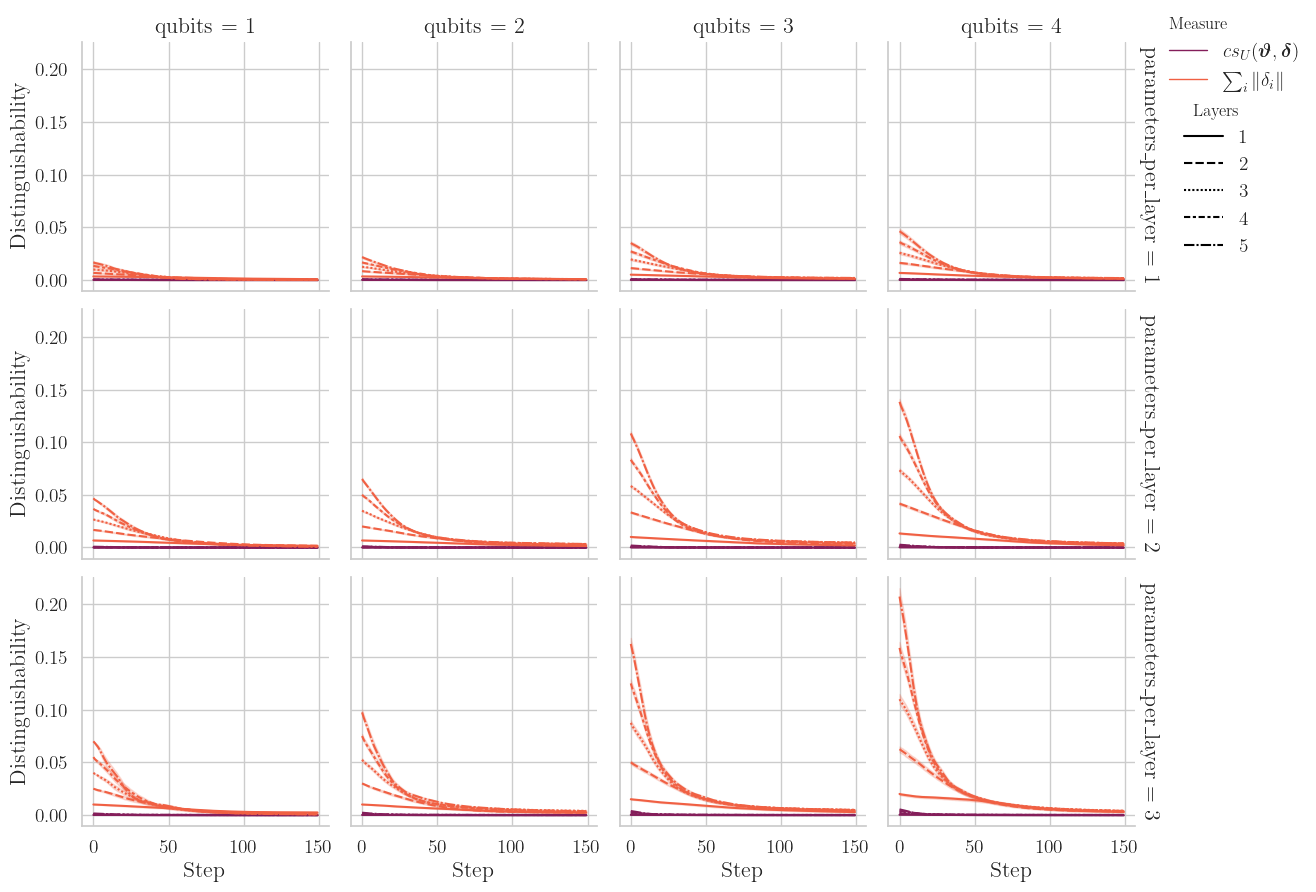

In [12]:
cp = sns.color_palette("rocket", 2)
fg = sns.FacetGrid(data=detailed, col='qubits', row='parameters_per_layer', margin_titles=True)
fg.map_dataframe(sns.lineplot, x='step', y='dnorm', style='layers', style_order=[1, 2, 3, 4, 5], color=cp[0])
fg.map_dataframe(sns.lineplot, x='step', y='rel_chg', style='layers', style_order=[1, 2, 3, 4, 5], color=cp[1])
fg.set_axis_labels("Step", "Distinguishability")
fg.add_legend(title='Layers', bbox_to_anchor=(1.0,0.8))
leg = fg.figure.legends[-1]  # Get the last added legend
for line in leg.get_lines():
    line.set_color('black')


custom_lines = [Line2D([0], [0], color=cp[0], lw=1),
                Line2D([0], [0], color=cp[1], lw=1)]
second_legend = fg.figure.legend(custom_lines, ['$cs_U(\\boldsymbol{\\vartheta}, \\boldsymbol{\\delta})$', '$\\sum_i\\|\\delta_i\\|$'], 
                             title='Measure', bbox_to_anchor=(1.04, 1), frameon=False)
second_legend.set_alignment('left')
plt.savefig("plots/diamond-norm-vs-bound.png", bbox_inches='tight')
plt.show()

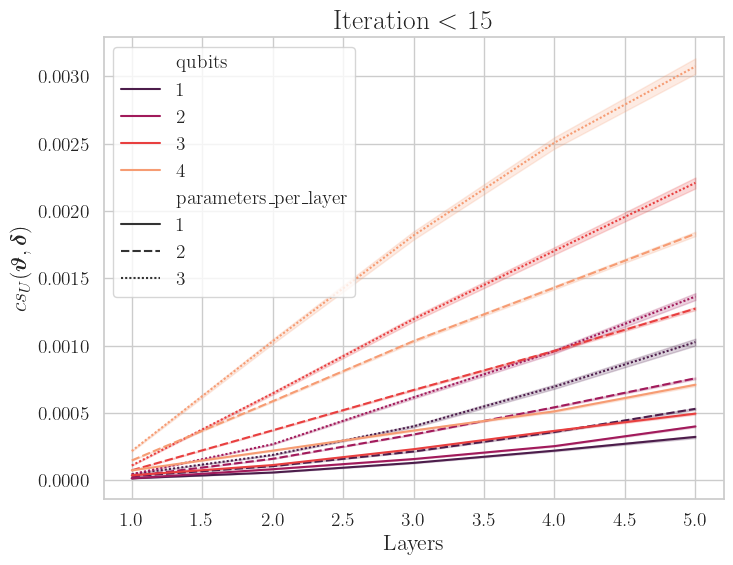

In [10]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=detailed[detailed['step'] < 15], x='layers', y='dnorm', style='parameters_per_layer', hue='qubits', palette=sns.color_palette("rocket", 4))
plt.title("Iteration $<$ 15", size=20)
plt.xlabel("Layers")
# plt.ylabel("$\\|U(\\vec{\\theta}_i) - U(\\vec{\\theta}_{i+1})\\|_\\diamond$")
plt.ylabel("$cs_U(\\boldsymbol{\\vartheta}, \\boldsymbol{\\delta})$")
plt.savefig("plots/dnorm_15.png")
plt.show()

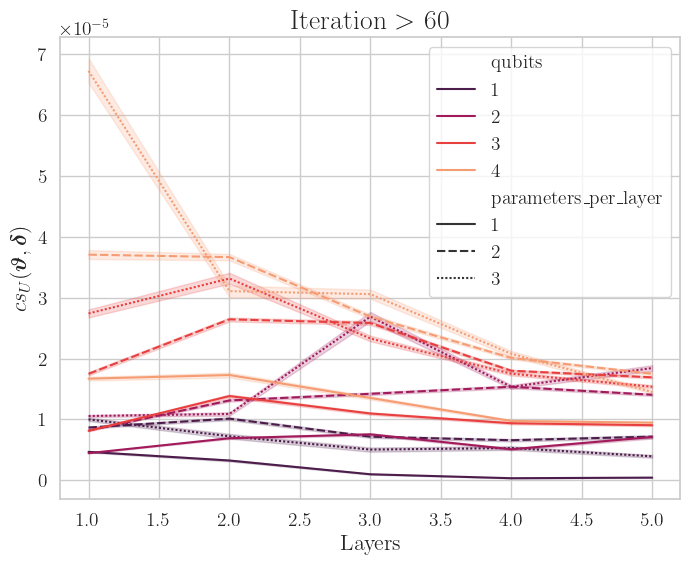

In [11]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=detailed[detailed['step'] > 60], x='layers', y='dnorm', style='parameters_per_layer', hue='qubits',  palette=sns.color_palette("rocket", 4)) 
plt.title("Iteration $>$ 60", size=20)

plt.xlabel("Layers")
# plt.ylabel("$\\|U(\\vec{\\theta}_i) - U(\\vec{\\theta}_{i+1})\\|_\\diamond$")
plt.ylabel("$cs_U(\\boldsymbol{\\vartheta}, \\boldsymbol{\\delta})$")
plt.savefig("plots/dnorm_60.png")
plt.show()

In [ ]:
print("Models Trained", detailed[detailed['dnorm'] != np.inf].groupby(['layers', 'qubits', 'method_readable', 'ds', 'rep' ]).count().shape[0])

In [ ]:
print(f"Bound holds in all cases: {np.all(detailed['rel_chg'] - detailed['dnorm'] >= -1e-30)}")

In [9]:
detailed[(detailed['step'] < 10)].groupby(['qubits', 'layers'])[['changed', 'mean_change']].agg(['max', 'mean', 'std']).mean()

changed      max     1.000000
             mean    0.998678
             std     0.011371
mean_change  max     0.014102
             mean    0.008160
             std     0.004512
dtype: float64

In [ ]:
sns.lineplot(detailed, x='step', y='changed', hue='qubits', style='qubits', palette=sns.color_palette("rocket", 4))
plt.xlabel("Iteration")
plt.ylabel("$\\overline{\\Delta_{chg} \\vec{\\theta}}$")
plt.title('Mean Number of Parameters Changed')
# add note below xlabel
plt.text(0.5, -0.2, "$\\Delta_{chg}\\vec{\\theta} = \\sum 1_{\\vec{\\theta}_{prev} \\ne \\vec{\\theta}_{new}}$", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.savefig('plots/mean_params_changed.png', bbox_inches='tight')
plt.show()

In [ ]:
sns.lineplot(detailed, x='step', y='mean_change', hue='qubits', style='qubits', palette=sns.color_palette("rocket", 4))
plt.xlabel("Iteration")
plt.ylabel("$\\overline{\\Delta \\vec{\\theta}}$")
plt.title('Mean Parameter Update per Step')
# add note below xlabel
plt.text(0.5, -0.2, "$\\Delta\\vec{\\theta} = |\\vec{\\theta}_{prev} - \\vec{\\theta}_{new}|$", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.savefig('plots/mean_change.png', bbox_inches='tight')
plt.show()